In [6]:
### Policy enumeration takes into consideration all the posible policies, then find their value functions 
### For each and then compare each of them to find the best policy.

### This takes a huge amount of time, and in case of large state or action space, the combinations might explode

### Again as we have already seen, if we find the best policy early also, we need to go through all the policies

### For such cases, we introduce a policy improvement, or policy iteration method. 

### This method tunes the policy in such a that confirms monotonic increase in the value function.

### When the value function converges, or is not increased any further, we select the policy of that moment 
### as the optimal policy.

### In order to achieve this a Q function or a state-action value function is established.

### As value function gave the expectation of rewards from a state, state-action value function
### provides the expectation of rewards for an action at a particular state

### It is given by: Q(s,a)

### For every state, the expectation of future rewards for all the actions are calculated, and the action with the 
### maximum expected return is selected as the action for that given state.

### The theorem states, if we consider the max return as the action for the state, the new policy must be better or same 
### as the previous one.


### Problem

In [7]:
import matplotlib.pyplot as plt
import cv2

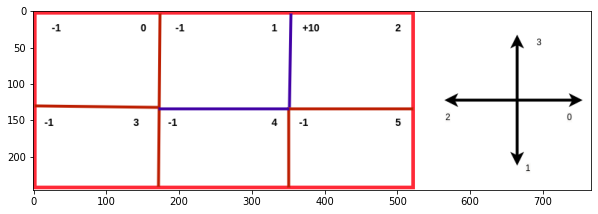

In [8]:
img=cv2.imread("MDP_Policy_iteration.png")
plt.figure(figsize = (10,10))
plt.imshow(img)
plt.show()

### Formulation

In [9]:
import numpy as np

In [10]:
### The formulation of MDP is same as in policy enumeration

### R -> A x S x 1 
### P -> A x S x S
### Q -> A x S x 1

### Where value funcion V -> S x 1

### Q = R_tr + gamma*P*V

### (A x S x S) x (S x 1) = (A x S x 1)->Q

### So, the Q(s,a) contains the expectation of future function for all states under an action for all actions. Then 
### we select the best action having the maximum value for that state. 

### for V we take the maximum on the action axis, so the value for that state is the value
### corresponding to the maximum value for any action on that state. And the policy will have the
### action that produces the maximum value.

In [ ]:
### V_pi(s)= r(s,pi(s)) +  gamma*Sum(P(s'|s) x V_pi(s')) : Bellman backup equation for a particular policy

### Policy Iteration

#### Deterministic Approach

In [12]:
import copy

In [29]:
def get_policy(Transition_Matrix,Reward_Matrix,gamma,states,epsilon=0.001):

  V_curr=np.zeros((len(states),1))
  V_prev=np.ones((len(states),1))

  ### Initializing value functions 

  log=[]

  while (((V_curr-V_prev)**2).sum())**0.5>epsilon:    ### Using L2 norm for checking for convergence
    Q = Reward_Matrix + gamma * np.matmul(Transition_Matrix,V_curr)        ### Finding state-action value Q(s,a)
    V_prev=copy.deepcopy(V_curr)
    V_curr=np.max(Q,axis=0)                      ### Updating value function with the max value of Q, on axis 0 or actions axis
    policy=np.argmax(Q,axis=0)                  ### Updating policy similar to as above
    log.append((policy.flatten(),V_curr.sum()))   ### Logging (policy,corresponding value function)

  best_policy=sorted(log, key=lambda e: e[1])[-1]     ### Obtaining the best policy by sorting the log based on value function

  return best_policy,log


In [34]:
#### The original algorithm  has a different convergence condition. 

### it convergence when the policy changes no more. So instead of comparing the value 
### functions from two steps, we compare the policies of two consecutive steps
### If no change: convergence achieved. But it procuces suboptimal solution and so
### value based condition works better.  

In [30]:
P_tr=np.array([
    [
        [0,1,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
        [0,0,0,0,0,1],
    ],
    [
        [0,0,0,1,0,0],
        [0,1,0,0,0,0],
        [0,0,0,0,0,1],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
        [0,0,0,0,0,1],
    ],
    [
        [1,0,0,0,0,0],
        [1,0,0,0,0,0],
        [0,0,1,0,0,0],
        [0,0,0,1,0,0],
        [0,0,0,1,0,0],
        [0,0,0,0,1,0],
    ],
    [
        [1,0,0,0,0,0],
        [0,1,0,0,0,0],
        [0,0,1,0,0,0],
        [1,0,0,0,0,0],
        [0,0,0,0,1,0],
        [0,0,1,0,0,0],
    ],

])        ### Transition Dynamics

R_tr=np.array([
    [
        [-1],
        [-1],
        [10],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [10],
        [-1],
        [-1],
        [-1]
    ],
    [
        [-1],
        [-1],
        [-1],
        [-1],
        [-1],
        [10]
    ],
])    ### Reward Dynamics
gamma=0.9
actions=[0,1,2,3]
states=[0,1,2,3,4,5]


In [31]:
best_policy,log=get_policy(P_tr,R_tr,gamma,states)  ### Obtaining the best policy 

In [32]:
best_policy

(array([1, 2, 0, 0, 0, 3]), 500.43913876634764)

In [ ]:
### convergence plot: We can see the policy is obtained after 85 epochs only.

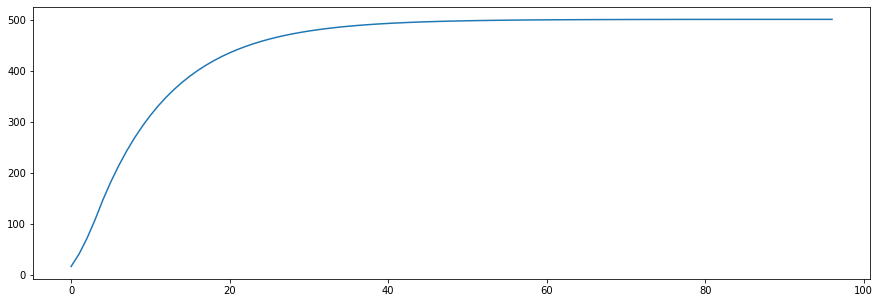

In [33]:
fig=plt.figure(figsize=(15,5))
ax=fig.add_subplot(111)
plt.plot([i for i,e in enumerate(log)],[e[1] for e in log])

#### Probabilistic Approach

In [ ]:
### In the above case, we have consider only deterministic transition matrix but the transtions
### can be probabilistic too. That is on taking an action on a state, the state St+1 is reached 
### sampling from a probabilistic distribution.

### So for the case, the transition dynamics looks like:
"""
[0.3 0.4 0.3]
[0.5 0.2 0.3]
[0.6 0.1 0.3]
"""

#### So to get the next state we sample based on this distribution.

### In such cases, we can not use max or argmax as, for such cases the policy is for each state,
### we obtain the probability distribution of the possible action, and we sample from the distribution 
### to get the action at that state.

## we obtain policy as:
"""
(array([[2.37219334e-07, 9.99344712e-01, 3.27525410e-04, 3.27525410e-04],
        [7.22707326e-04, 7.22707326e-04, 9.97831878e-01, 7.22707326e-04],
        [4.99991650e-01, 8.34933053e-06, 4.99991650e-01, 8.35071094e-06],
        [9.99730480e-01, 1.34737976e-04, 1.34737976e-04, 4.41590476e-08],
        [9.99899725e-01, 5.01339576e-05, 6.75676905e-09, 5.01339576e-05],
        [1.66983822e-05, 1.66983822e-05, 8.37239942e-10, 9.99966602e-01]]),
 500.4152944655599)
"""

### For all 6 steps, we get a probabilty distribution of all the possible 4 actions

### We use softmax function in place of argmax.

### Modification in code:

## pi=((np.e**Q)/np.sum(np.e**Q,axis=0))  ## Policy update
## V=np.multiply(((np.e**Q)/np.sum(np.e**Q,axis=0)),Q).sum(axis=0)  ## Value function update